In [46]:
# %matplotlib widget

import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

def gather_stats(experiment_path):
    df = None
    
    experiment_instance_id = int(experiment_path.split(',')[-1].split(':')[-1])

    for dir_name in os.listdir(experiment_path):        
        dir_path = os.path.join(experiment_path, dir_name)
        runid = int(dir_name)
        
        try:
            with open(os.path.join(dir_path, 'acc.txt'), 'r') as f:
                acc = float(f.read().strip()[:-1])
                
            with open(os.path.join(dir_path, 'top3.txt'), 'r') as f:
                top3 = float(f.read().strip()[:-1])
                
            with open(os.path.join(dir_path, 'top5.txt'), 'r') as f:
                top5 = float(f.read().strip()[:-1])

            with open(os.path.join(dir_path, 'ratio.txt'), 'r') as f:
                ratio = float(f.read().strip())

            with open(os.path.join(dir_path, 'train_size.txt'), 'r') as f:
                train_size = int(f.read().strip())

            with open(os.path.join(dir_path, 'valid_size.txt'), 'r') as f:
                valid_size = int(f.read().strip())

            with open(os.path.join(dir_path, 'test_size.txt'), 'r') as f:
                test_size = int(f.read().strip())

            if df is None:
                df = pd.DataFrame({
                    'experimentid': [experiment_instance_id],
                    'runid': [runid],
                    'acc': [acc],
                    'top3': [top3],
                    'top5': [top5],
                    'ratio': [ratio],
                    'train_size': [train_size],
                    'valid_size': [valid_size],
                    'test_size': [test_size]
                })
            else:
                df = pd.concat((df, pd.DataFrame({
                    'experimentid': [experiment_instance_id],
                    'runid': [runid],
                    'acc': [acc],
                    'top3': [top3],
                    'top5': [top5],
                    'ratio': [ratio],
                    'train_size': [train_size],
                    'valid_size': [valid_size],
                    'test_size': [test_size]
                })))
        except:
            pass

    return df

def color(experiment):
    if 'RandomSampler' in experiment:
        return [val / 255 for val in (25, 58, 57)]
    
    if 'KMeansSampler' in experiment:
        return [val / 255 for val in (92, 211, 164)]
    
    if 'KMeansPuritySampler' in experiment:
        return [val / 255 for val in (63, 136, 174)]
    
    if 'ResNetKMeansDinoSampler' in experiment:
        return [val / 255 for val in (221, 84, 113)]
    
    if 'KMeansPurityDinoSampler' in experiment:
        return [val / 255 for val in (248, 147, 33)]

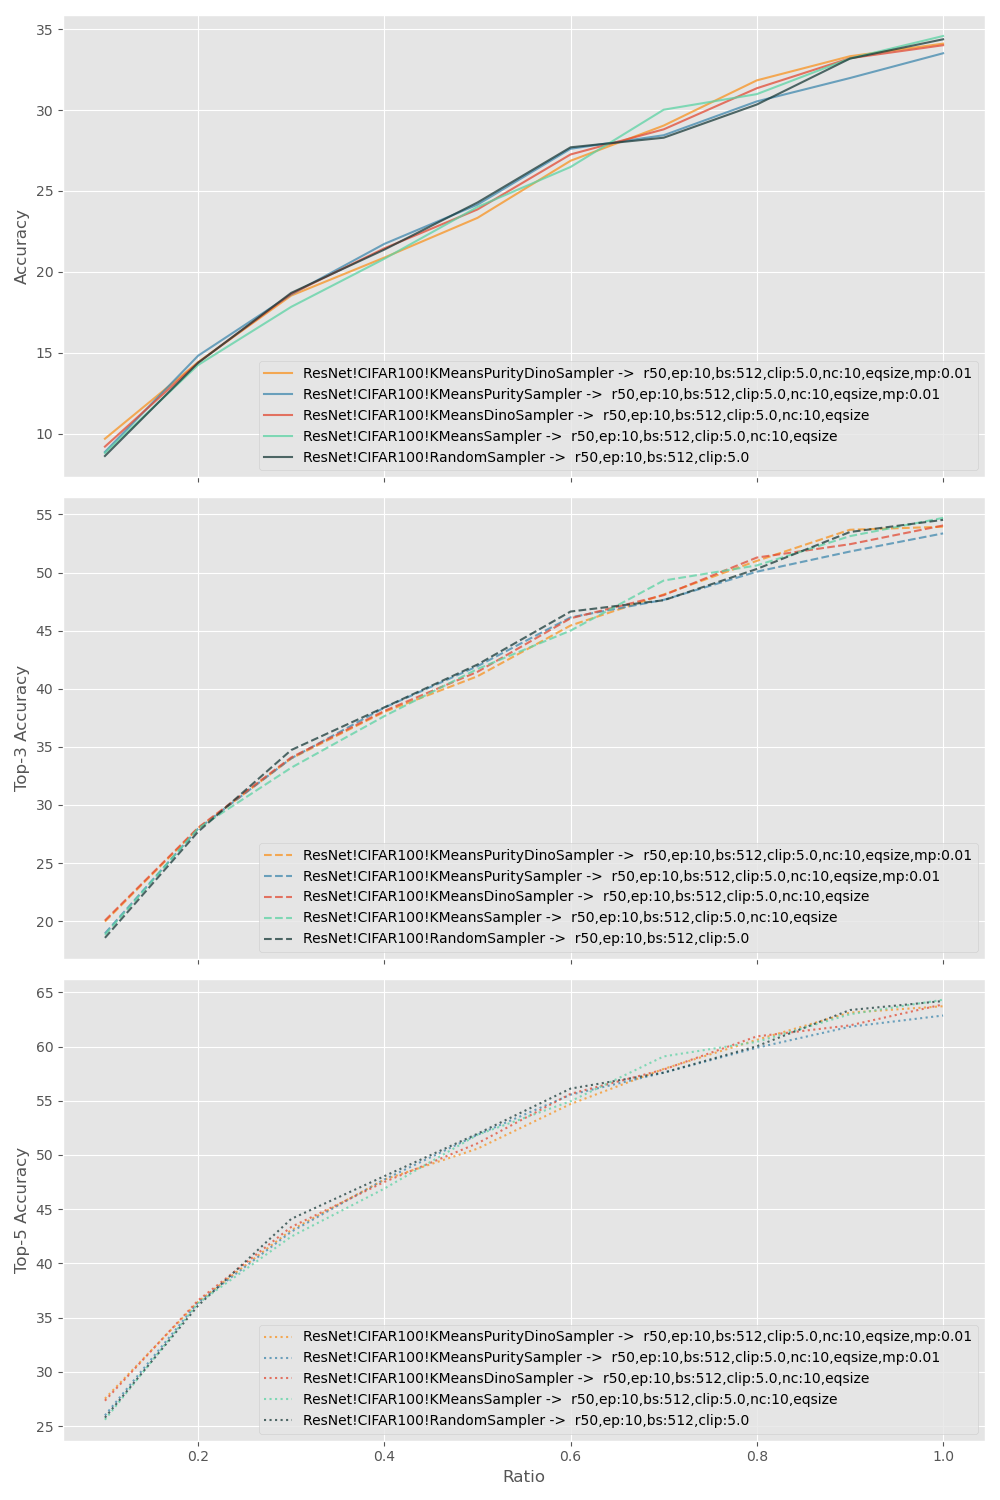

In [47]:
aggregated = {}

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for experiment in os.listdir("../experiments"):
    if not experiment.startswith("ResNet!CIFAR100"): continue
    
    for run in os.listdir(os.path.join("../experiments", experiment)):        
        path = os.path.join("../experiments", experiment, run)
        
        ID = int(run.split(',')[-1].split(':')[-1])
        if ID not in [5,6,10]: continue
        
        df = gather_stats(path)
        
        if df is None: continue
        
        instance = f"{experiment} ->  {','.join(run.split(',')[:-1])}"
        
        if instance not in aggregated:
            aggregated[instance] = df
        else:
            aggregated[instance] = pd.concat([aggregated[instance], df])
        
        df = df.sort_values(by='runid')
        
for instance, df in aggregated.items():
    group = df.groupby(['ratio']).mean().reset_index()
    
    axes[0].plot(group['ratio'], group['acc'], label=instance, color=color(instance), alpha=0.75)
    axes[1].plot(group['ratio'], group['top3'], label=instance, linestyle='--', color=color(instance), alpha=0.75)
    axes[2].plot(group['ratio'], group['top5'], label=instance, linestyle=':', color=color(instance), alpha=0.75)
    

axes[0].set_ylabel('Accuracy')
axes[1].set_ylabel('Top-3 Accuracy')
axes[2].set_ylabel('Top-5 Accuracy')
axes[2].set_xlabel('Ratio')

# fig.legend(loc='lower right', bbox_to_anchor=(1, 0))
axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()


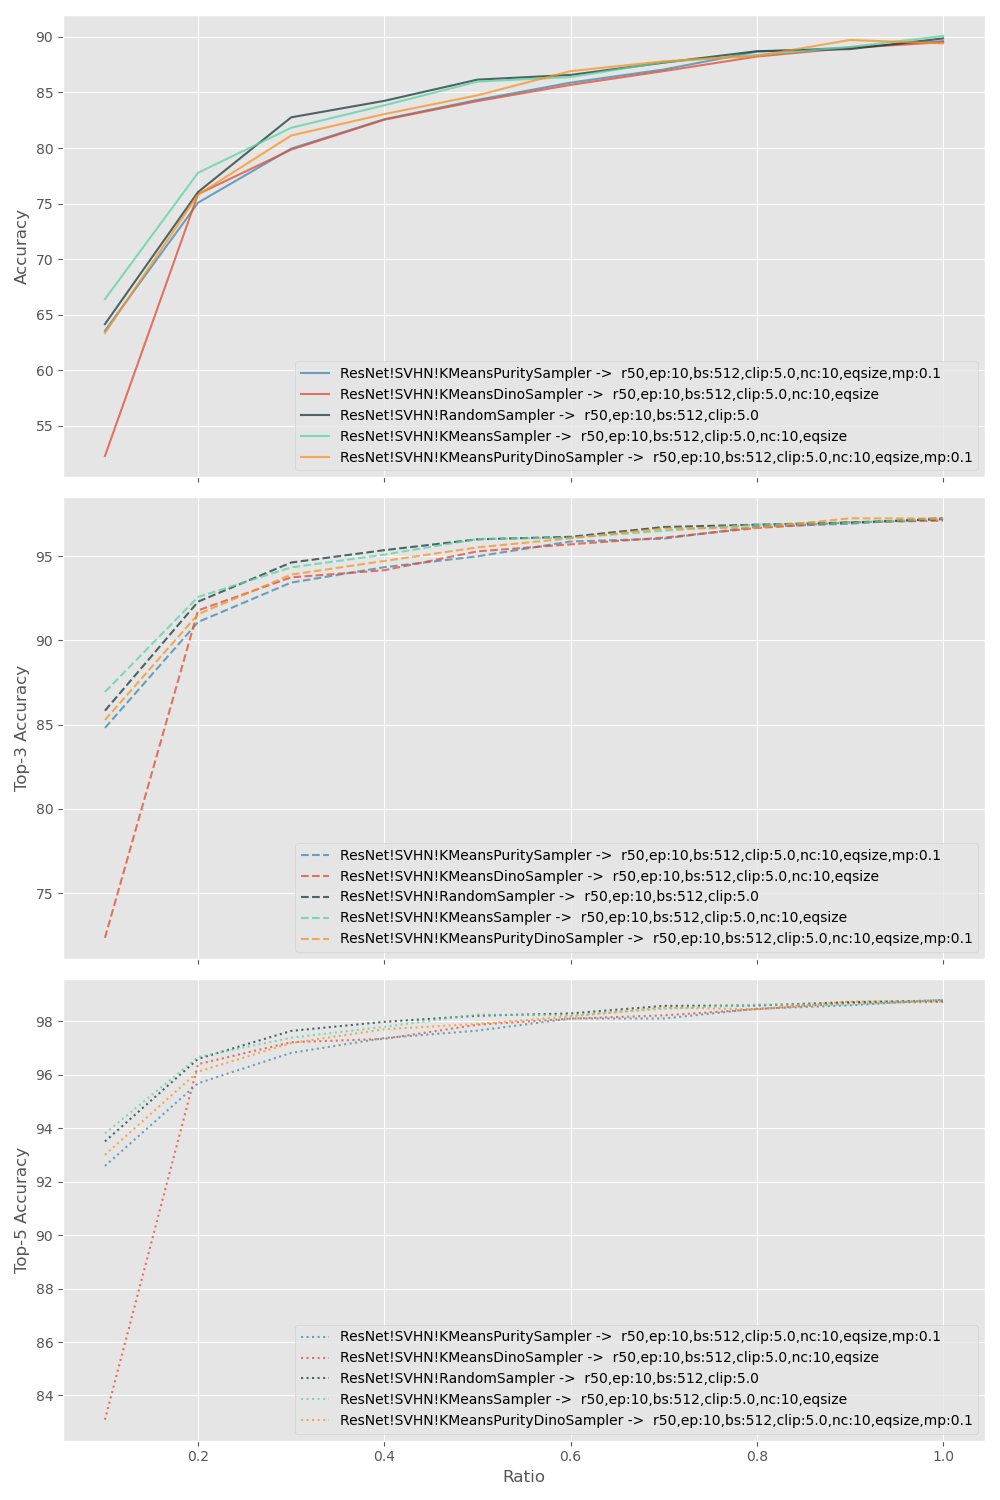

In [48]:
aggregated = {}

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for experiment in os.listdir("../experiments"):
    if not experiment.startswith("ResNet!SVHN"): continue
    
    for run in os.listdir(os.path.join("../experiments", experiment)):        
        path = os.path.join("../experiments", experiment, run)
        
        ID = int(run.split(',')[-1].split(':')[-1])
        if ID not in [5,6,10]: continue
        
        df = gather_stats(path)
        
        if df is None: continue
        
        instance = f"{experiment} ->  {','.join(run.split(',')[:-1])}"
        
        if instance not in aggregated:
            aggregated[instance] = df
        else:
            aggregated[instance] = pd.concat([aggregated[instance], df])
        
        df = df.sort_values(by='runid')
        
for instance, df in aggregated.items():
    group = df.groupby(['ratio']).mean().reset_index()
    
    axes[0].plot(group['ratio'], group['acc'], label=instance, color=color(instance), alpha=0.75)
    axes[1].plot(group['ratio'], group['top3'], label=instance, linestyle='--', color=color(instance), alpha=0.75)
    axes[2].plot(group['ratio'], group['top5'], label=instance, linestyle=':', color=color(instance), alpha=0.75)
    

axes[0].set_ylabel('Accuracy')
axes[1].set_ylabel('Top-3 Accuracy')
axes[2].set_ylabel('Top-5 Accuracy')
axes[2].set_xlabel('Ratio')

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.tight_layout()
plt.show()


Gathering: ../experiments/VGG!CIFAR100!KMeansPurityDinoSampler/vgg16_kiss,ep:10,bs:512,clip:5.0,nc:10,eqsize,mp:0.01,ID:6 6
Gathering: ../experiments/VGG!CIFAR100!KMeansPuritySampler/vgg16_kiss,ep:10,bs:512,clip:5.0,nc:10,eqsize,mp:0.01,ID:6 6
Gathering: ../experiments/VGG!CIFAR100!KMeansSampler/vgg16_kiss,ep:10,bs:512,clip:5.0,nc:10,eqsize,ID:6 6
Gathering: ../experiments/VGG!CIFAR100!KMeansDinoSampler/vgg16_kiss,ep:10,bs:512,clip:5.0,nc:10,eqsize,ID:6 6
Gathering: ../experiments/VGG!CIFAR100!RandomSampler/vgg16_kiss,ep:10,bs:512,clip:5.0,ID:6 6


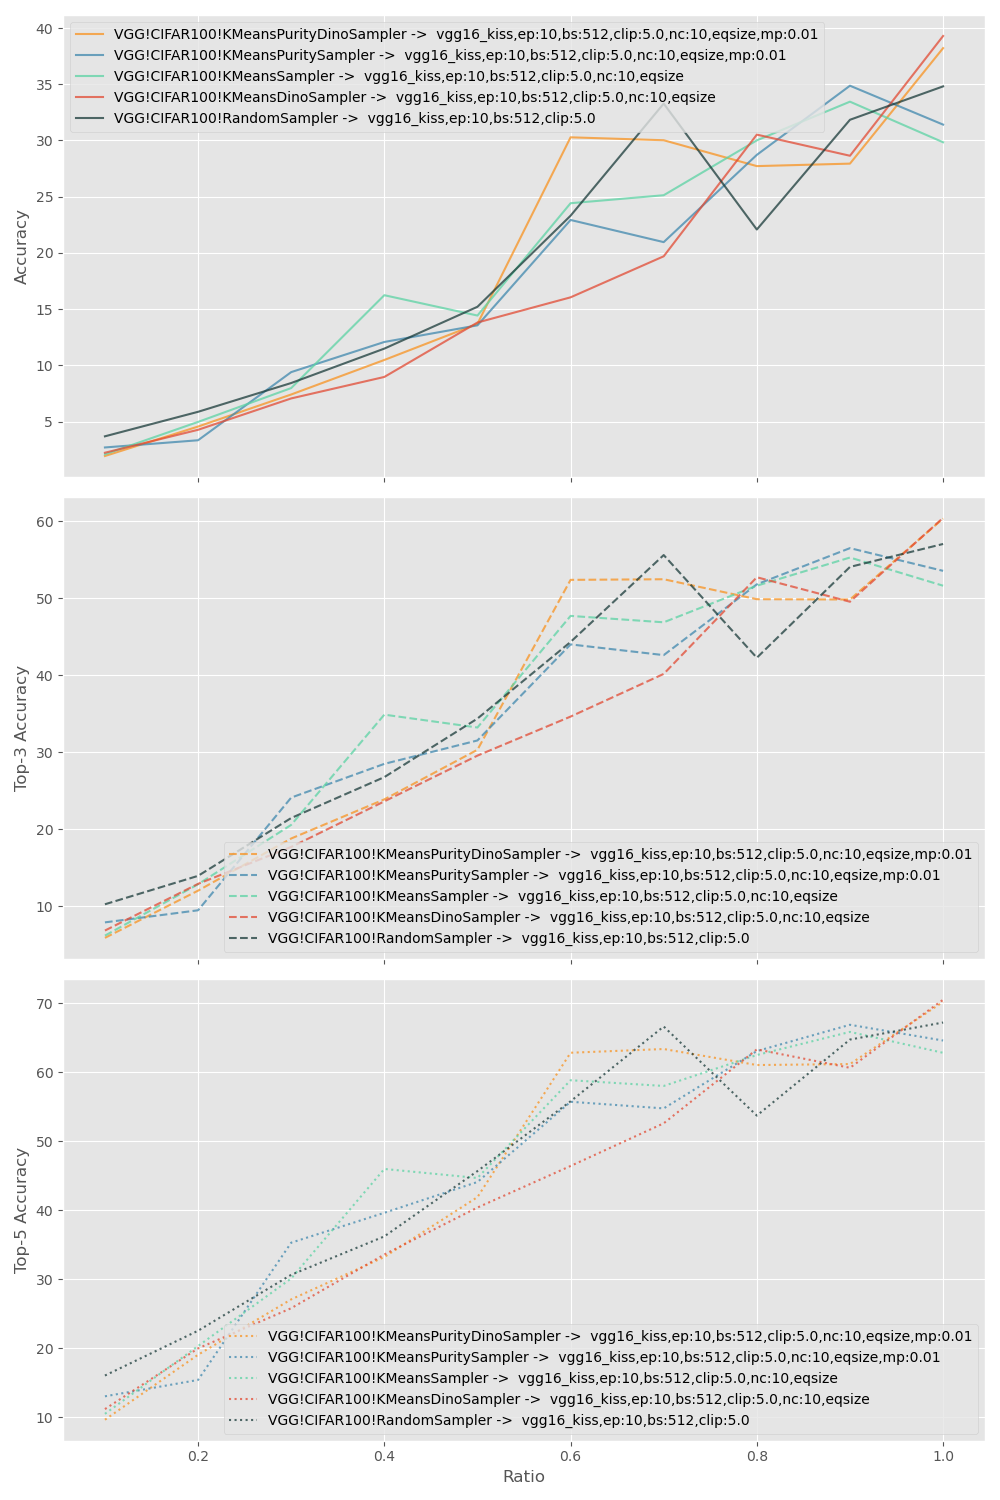

In [49]:
aggregated = {}

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for experiment in os.listdir("../experiments"):
    if not experiment.startswith("VGG!CIFAR100"): continue
    
    for run in os.listdir(os.path.join("../experiments", experiment)):        
        path = os.path.join("../experiments", experiment, run)
        
        ID = int(run.split(',')[-1].split(':')[-1])
        if ID not in [6]: continue
        
        print("Gathering:", path, ID)
        
        df = gather_stats(path)
        
        if df is None: continue
        
        instance = f"{experiment} ->  {','.join(run.split(',')[:-1])}"
        
        if instance not in aggregated:
            aggregated[instance] = df
        else:
            aggregated[instance] = pd.concat([aggregated[instance], df])
        
        df = df.sort_values(by='runid')
        
for instance, df in aggregated.items():
    group = df.groupby(['ratio']).mean().reset_index()
    
    axes[0].plot(group['ratio'], group['acc'], label=instance, color=color(instance), alpha=0.75)
    axes[1].plot(group['ratio'], group['top3'], label=instance, linestyle='--', color=color(instance), alpha=0.75)
    axes[2].plot(group['ratio'], group['top5'], label=instance, linestyle=':', color=color(instance), alpha=0.75)
    
    
axes[0].set_ylabel('Accuracy')
axes[1].set_ylabel('Top-3 Accuracy')
axes[2].set_ylabel('Top-5 Accuracy')
axes[2].set_xlabel('Ratio')

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.tight_layout()
plt.show()


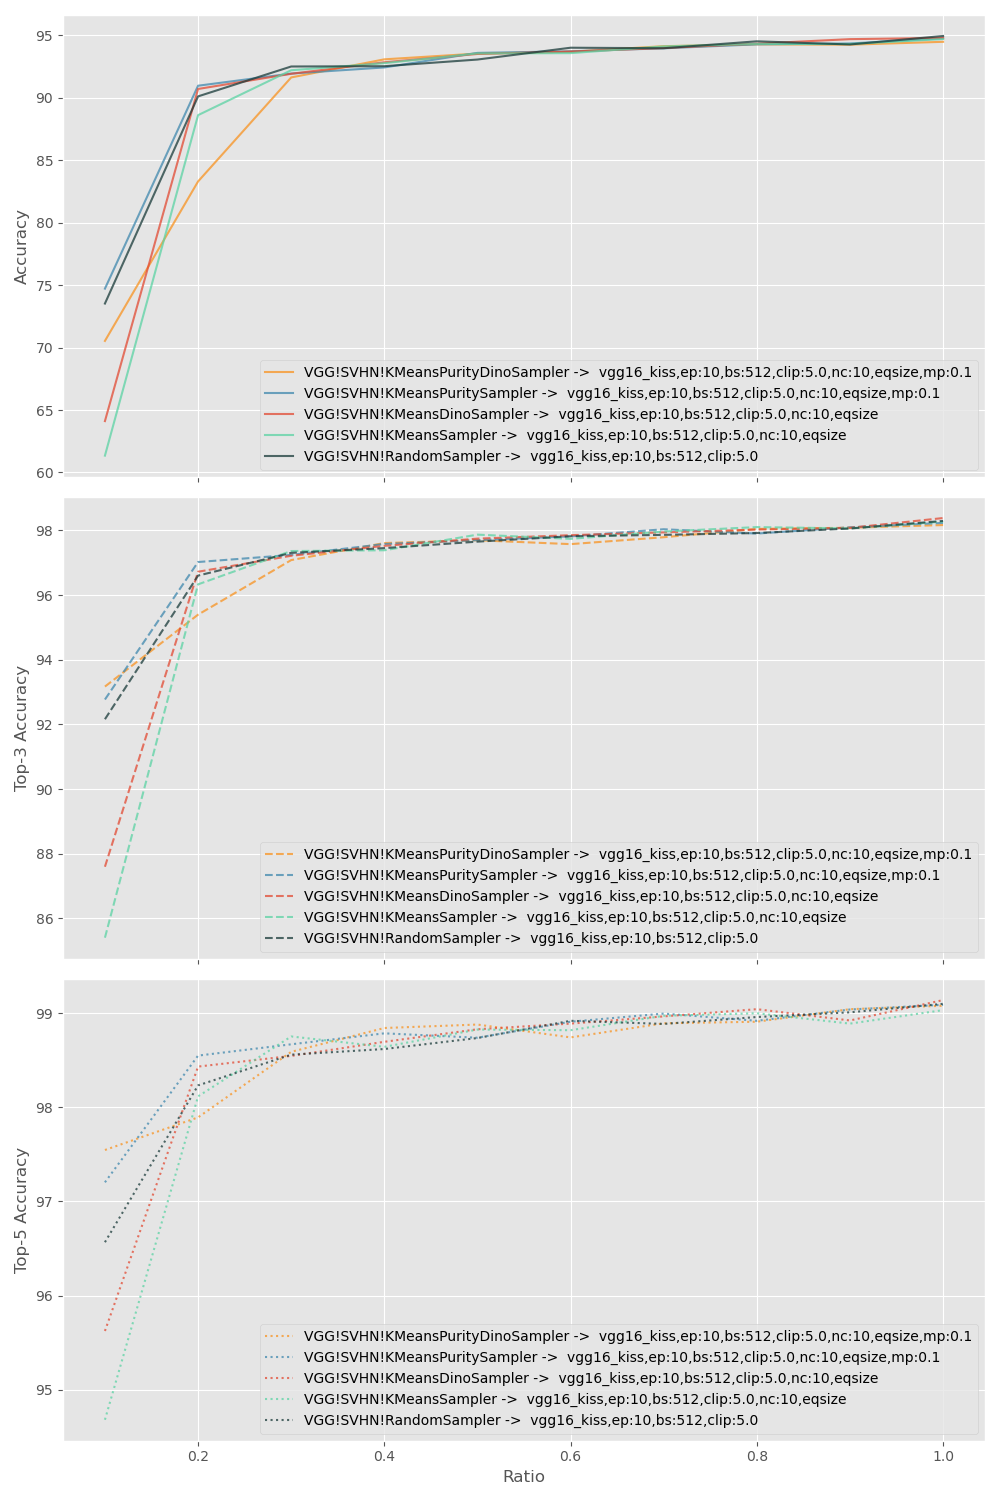

In [50]:
aggregated = {}

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for experiment in os.listdir("../experiments"):
    if not experiment.startswith("VGG!SVHN"): continue
    
    for run in os.listdir(os.path.join("../experiments", experiment)):        
        path = os.path.join("../experiments", experiment, run)
        
        ID = int(run.split(',')[-1].split(':')[-1])
        if ID not in [5,6,10]: continue
        
        df = gather_stats(path)
        
        if df is None: continue
        
        instance = f"{experiment} ->  {','.join(run.split(',')[:-1])}"
        
        if instance not in aggregated:
            aggregated[instance] = df
        else:
            aggregated[instance] = pd.concat([aggregated[instance], df])
        
        df = df.sort_values(by='runid')
        
for instance, df in aggregated.items():
    group = df.groupby(['ratio']).mean().reset_index()
    
    axes[0].plot(group['ratio'], group['acc'], label=instance, color=color(instance), alpha=0.75)
    axes[1].plot(group['ratio'], group['top3'], label=instance, linestyle='--', color=color(instance), alpha=0.75)
    axes[2].plot(group['ratio'], group['top5'], label=instance, linestyle=':', color=color(instance), alpha=0.75)
    

axes[0].set_ylabel('Accuracy')
axes[1].set_ylabel('Top-3 Accuracy')
axes[2].set_ylabel('Top-5 Accuracy')
axes[2].set_xlabel('Ratio')

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.tight_layout()
plt.show()
